In [3]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Final Presentation

## Introduction
For our project, we define "bestness" as safety. Thus, the safest neighborhood will be considered the best, while the most dangerous neighborhood to live in would be considered the worst. 

We will be using these datasets:
1. Police Incidents: https://data.wprdc.org/dataset/police-incident-blotter.  Downloaded on 11-13-2023
2. Police Arrests: https://data.wprdc.org/dataset/arrest-data
3. Firearm Seizures: https://data.wprdc.org/dataset/pbp-fire-arm-seizures


## Metric
There will exist $3$ submetrics within this project. Each submetric will produce a "ranking" of neighborhoods, as stored as a Series. Afterwards, a consensus shall be made among members to determine the best neighborhood, based on such rankings.


### Submetric 1: Police Incidents
Police Incidents will be the first sub-metric. We shall be using this dataset: https://data.wprdc.org/dataset/police-incident-blotter.
Each neighborhood will be assigned a "Bad Value," as determined by the following arbitrary equation: 

$N = z + \sum_{i_0}^{i_k}v_i$

Where $i$ is the $i$th incident of the neighborhood within the dataset, with $i_0$ being the first in the dataset and $i_k$ being the last,
where $v_i$ is the "bad" value of the $i$th incident(as determined by another ranking, based on the INCIDENTHIERARCHYDESC column, an **opinionated ranking**),
and where $z$ is the amount of incidents in that neighborhood.

Each neighborhood will be ranked, with the neighborhood with the lowest $N$ value being the best, while the neighborhood with the highest $N$ value being the worst.


We will first determine the $z$ values for each neighborhood.

In [4]:
police_incidents = pd.read_csv("incidentBlotter.csv")
z_vals = police_incidents['INCIDENTNEIGHBORHOOD'].value_counts()

Visualization of the total police incidents per neighborhood:

<Axes: ylabel='INCIDENTNEIGHBORHOOD'>

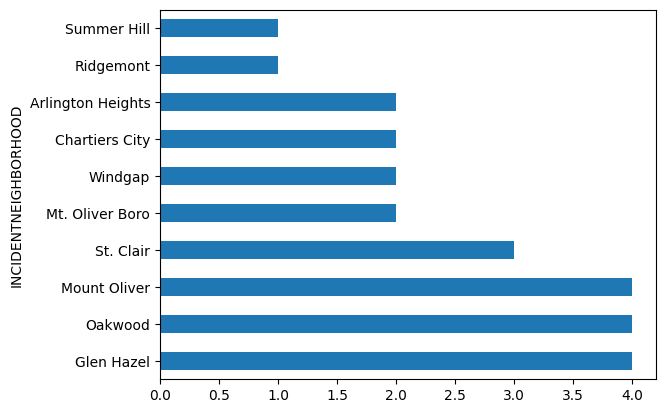

In [7]:
z_vals.tail(10).plot.barh()

As we can see, **Summer Hill** and **Ridgemont** has the least incidents.

Now, we determine the $v_i$ values. This will be an **opinionated** ranking on the severity of the incidents.

In [8]:
i_v_vals = pd.Series(police_incidents['INCIDENTHIERARCHYDESC'].unique())
intList = []
for i in range(86):
    intList.append(i+1)

v_i_sorted = pd.Series(intList,index = ['99','DOG BITE','RUNAWAYS - JUVENILE','MISCELLANEOUS INVESTIGATION','FOUND PROPERTY','LOST PROPERTY','INJURY/TAMP/FIRE APP-HYD-ETC',
                        'FALSE RPT LAW ENFORCE AUTH',
                        'PROSTITUTION INVESTIGATION', 'SOLICITING ANOTHER TO PATRONIZE A PROSTITUTE','DISORDERLY CONDUCT', 'OPEN LEWDNESS', 'PUBLIC DRUNKENESS',
                        'FALSE ALARMS AGENCIES PUB SAF',  'FAILURE TO PREVENT CATASTROPHE', 'NEGLECT OF CARE-DEPENDENT PERSON',
                        'AGRICULTURAL VANDALISM', 'CREDIT CARDS', 'FORGERY', 
                        'BENCH WARRANT ARREST - NO TIE', 'NON-VIOLENT DOMESTIC', 'LOITERING PROWLING AT NIGHT', 'INDECENT EXPOSURE',
                        'RETALIATION FOR PAST OFF ACTION', 'UNAUTHORIZED USE VEHICLE', 'INTERFER/CUSTODY OF CHILDREN', 
                        'MENTAL 201/302', 'RESIST ARREST/OTHER LAW ENFORC', 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED', 'MISCELLANEOUS FIRE VEH INVEST CONTINUED',
                        'CRIMINAL TRESPASS', 'TAMPER WITH/FAB PHYS EVIDENCE', 
                        'FOUND DRUGS', 'THEFT OF SERVICES', 'ARREST ON ATTACHMENT ORDER',
                        'HARRASSMENT','HARRASSMENT/THREAT/ATTEMPT/PHY',  'PUR/CON/POS/TRAN-INTOX BEVERAG', 
                        'IDENTITY THEFT','SIMPLE ASSAULT','AIDED CASE', 'DRUG INVESTIGATION', 'CRIM MISCHIEF (GRAFFITI)',  'INDECENT ASSAULT', 'INDECENT ASSAULT WITHOUT CONSENT',
                        'CRIMINAL MISCHIEF','CRIM MISCHIEF','STOLEN PROPERTY','STOLEN PROPERTY - OTHER', 'RECEIVING STOLEN PROPERTY',
                        'DUI - GENERAL IMPAIRMENT', 'DUI - DRUG - IMPAIRED ABILITY','DUI - HIGHEST RATE OF ALCOHOL - BAC >= .16%', 'AGG-ASSAULT', 'RECKLESSLY ENDANGER ANOTH PER', 'DANGEROUS BURNING',
                        'INDUSTRIAL ACCIDENT', 'MEGANS LAW VIOLATION', 
                        'THEFT-FAIL MAKE DISP FUNDS REC',
                        'RETSIL THEFT (SHOPLIFTING)','RETAIL THEFT (SHOPLIFTING)','THEFT','THEFT BY DECEPTION','THEFT BY EXTORTION','THEFT FROM AUTO', 'TERROR RELATED REPORT - MISC.',
                        'TERRORISTIC THREATS', 'THEFT OF LEASED PROPERTY', 'BURGLARY', 'POSSIBLE STOLEN CAR RECOVERED', 
                        'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'FIREARMS NOT TO BE CARRIED WO LICENSE', 'PROHIBITED OFFENSIVE WEAPONS',  'ACCIDENTAL FIRE',
                        'MISSING PERSONS (18+)', 'LURING CHILD INTO MOTOR VEHICLE', 'CARRY WEAPONS ON SCHOOL PROP', 'HIT AND RUN',
                        'ENDANGER WELFARE OF CHILDREN','SEXUAL ASSAULT', 'RAPE', 'SEXUAL ABUSE OF CHILDREN', 'CONCEALING DEATH BASTARD CHILD', 
                        'DEAD ON ARRIVAL (DOA)','CRIMINAL HOMICIDE',])
#This took me half an hour :(
v_i_sorted

99                                 1
DOG BITE                           2
RUNAWAYS - JUVENILE                3
MISCELLANEOUS INVESTIGATION        4
FOUND PROPERTY                     5
                                  ..
RAPE                              82
SEXUAL ABUSE OF CHILDREN          83
CONCEALING DEATH BASTARD CHILD    84
DEAD ON ARRIVAL (DOA)             85
CRIMINAL HOMICIDE                 86
Length: 86, dtype: int64

Now, we crunch the numbers to determine the $N$ values for each neighborhood

<Axes: >

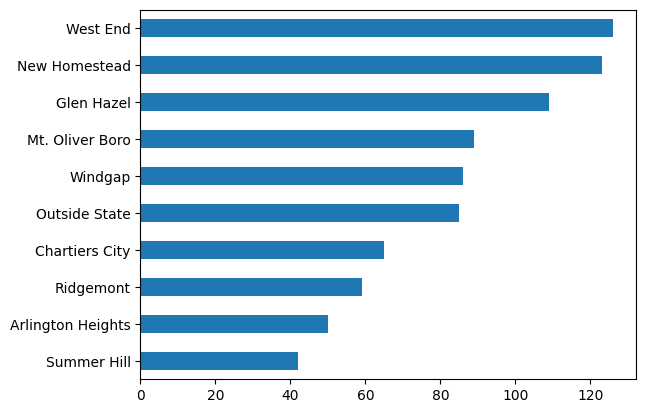

In [17]:
#Create an empty dictionary
n_values = {}

#This code sums the v_i values of each neighborhood
for index, row in police_incidents.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in n_values:
        n_values[row['INCIDENTNEIGHBORHOOD']] = 0 #Creates a new key within the dictionary with init value 0 if key is not already in dict
    for Vindex, item in v_i_sorted.items(): #I don't care about terrible efficieny, I just want this to work
        if row['INCIDENTHIERARCHYDESC'] == Vindex:
            n_values[row['INCIDENTNEIGHBORHOOD']] =  n_values[row['INCIDENTNEIGHBORHOOD']] + (item) #adds the int within the sorted v_i values into the value of the dict

#This code adds the z value for each neighborhood
for key in n_values:
    for index, item in z_vals.items(): #z_vals have unique keys, so the order of for loops doesn't matter
        if index == key:
            n_values[key] = n_values[key] + item

#Put into a final Series
police_incidents_final = pd.Series(n_values).sort_values()
#police_incidents_final.head().plot.bar()
police_incidents_final.head(10).plot.barh()

As we can see, **Summer Hill** has the least $N$ value out of all neighborhoods.

### Submetric 2: Police Arrests

The metric for this file will be the amount of arrests a neighborhood has (lower is better).

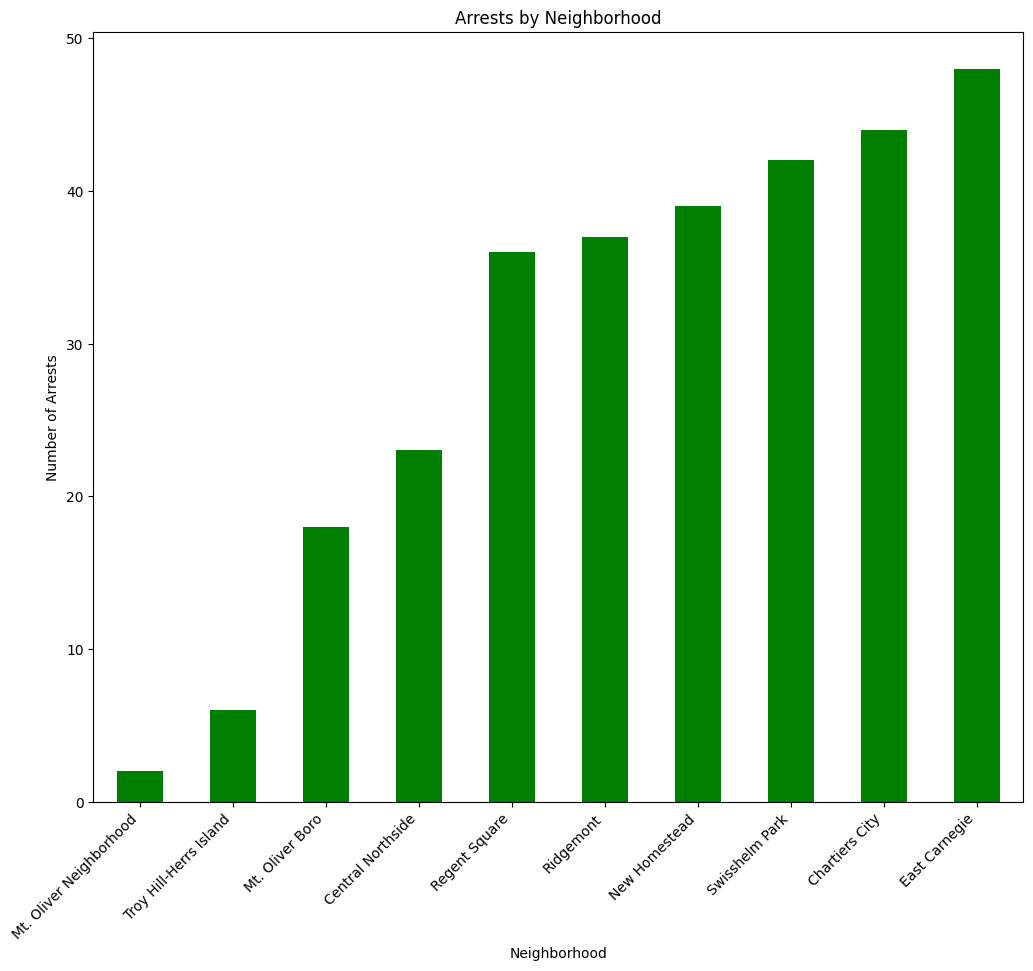

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

arrests = pd.read_csv("policeArrests.csv", sep = ",") #Reads in the file

#Grabs the INCIDENTNEIGHBORHOOD column and sorts it from least to greatest
arrests_by_category = arrests["INCIDENTNEIGHBORHOOD"].value_counts().sort_values()

# Plotting the bar graph
plt.figure(figsize=(12, 10))
arrests_by_category.head(10).plot(kind="bar", color="green") # View the first 10 values

#Labels
plt.title("Arrests by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45, ha="right")
plt.show()

### Initial Analysis
Since we are looking for the neighborhoods with the least amount of arrest, I picked the first 10 neighborhoods to display in order to narrow our margin but still give enough range to compare with our other neighborhoods. For this graph and my notebook, it looks like Mt. Oliver Neighborhood is the best neighborhood with the other neighborhoods being contenders for the final decision of the best neighborhood.

### Other Analysis

In [2]:
# average age of the arrests

print("Average age of the arrests: " + str(int(arrests["AGE"].mean())))

Average age of the arrests: 33


Throughout all of the neighborhoods, the average seems to be pretty young at a age of 33. 

Is there a reason why the average is so young?

In [3]:
# median age of the arrests

print("Median age of the arrests: " + str(int(arrests["AGE"].median())))

Median age of the arrests: 31


If we look at the median, it's very close to the average which means that we probably have a bell distribution. Let's see if we can plot this and see if this is true.

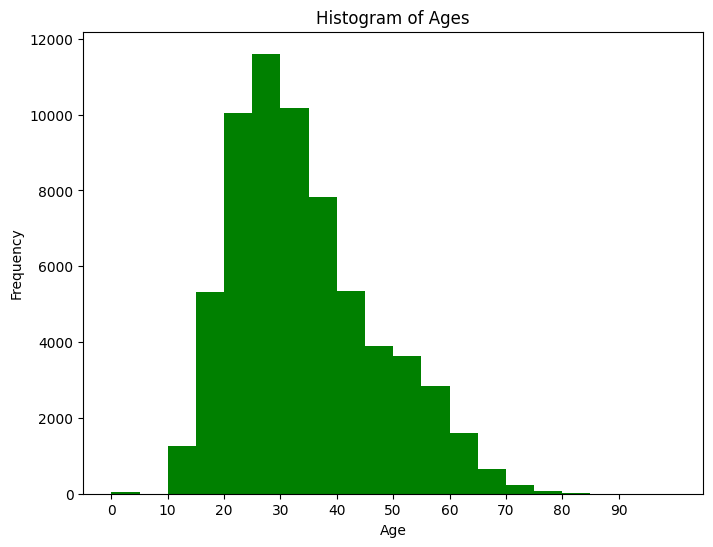

In [4]:
# Converts Age column to integers and has the upper limit of age to 100 (to reduce range)
arrests["AGE"] = pd.to_numeric(arrests["AGE"], errors="coerce", downcast="integer")
arrests["AGE"] = arrests["AGE"].clip(upper = 100)

# Creates a box and whiskers plot for the AGE column
plt.figure(figsize=(8, 6))
plt.hist(arrests["AGE"].dropna(), bins = 20, color = "green")
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(range(0, 100, 10))
plt.show()

As we analyze the "Histogram of Ages" we can see that the distribution is noticeably skewed right and most of the ages fall under 40. 

### Submetric 3: Firearm Seizures

The Metric: whichever neighborhood has the least firearm seizures is the best

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Reading the data

In [5]:
raw_data = pd.read_csv("policeArrests.csv")

 We obtain the number of firearm seizures within each neighborhood. The below plot shows the 10 neighborhoods with the lowest amount of firearm seizures.

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

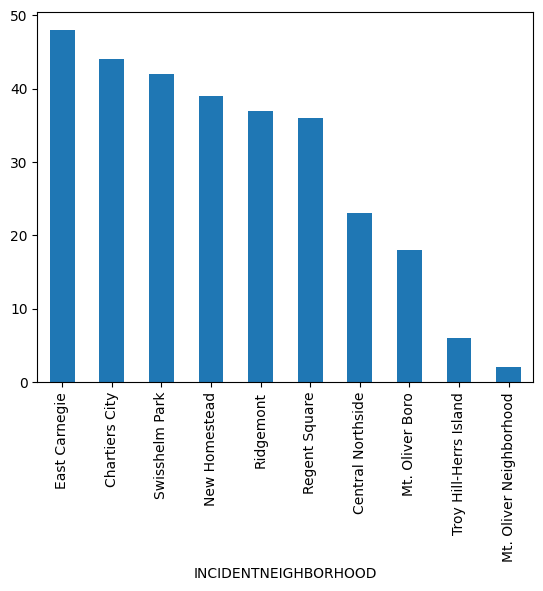

In [6]:
z_vals = raw_data['INCIDENTNEIGHBORHOOD'].value_counts()
z_vals.tail(10).plot.bar()

It looks like Mt Oliver and Troy Hill are contenders to be the best neighborhood as they have the lowest firearm seizures

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

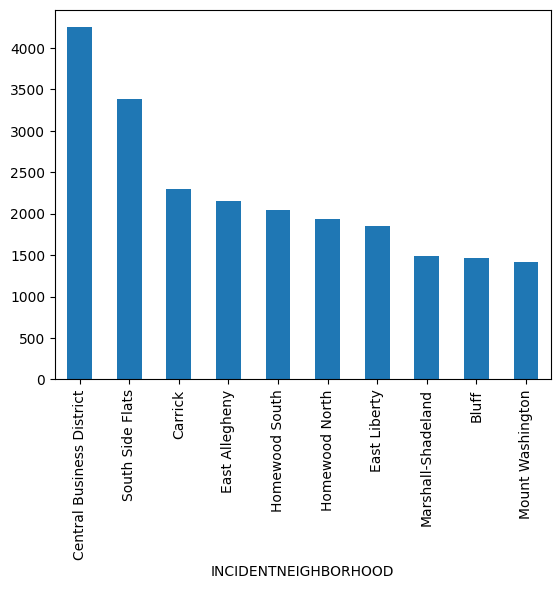

In [7]:
z_vals.head(10).plot.bar()

Central Business District has the most firearm seizures 

So I would say whichever neighborhood has the least amount of firearm seizures is the safest and therefore the best neighborhood. The best neighborhood would be Mt.Oliver

## Conclusion

### Yanjia: Police Reported Incidents

The conclusions from my own analysis were noticably different than that of my peers. Namely, that many of the neighborhoods ranked very high in my ranking were not ranked so high in other rankings. Given the nature my dataset being only incidents reported by police within a single day, I have thus concluded that my own conclusions would be weighted lower than that of my peers, as their datasets pertain to a much larger time period. If I were to weight my own conclusion equally to that of my peers, I would have chosen Mt. Oliver Boro to be the best. However, since my own data set is weighted lower, I have thus concluded that Mt. Oliver Neighborhood would be the best neighborhood based on our own metrics.

### Parth: Police Arrests

My conclusion had the same "best" neighborhood as Adeel, Mt. Oliver Neighborhood. Since me and Adeel used a similar basic test for the "best" neighborhood, as in using the lowest frequency, we had identical neighborhoods being ranked in the same spots. Yanjia used a more complex equation with a summation that might have isolated more variables then what we are seeing at face value, so it could have helped him get a more accurate answer to the "best" neighborhood. Our conclusions could easily have lurking variables that we did not consider. However, on face value, we believe that Mt. Oliver Neighborhood is the best neighborhood.

### Adeel: Firearm Seizures

My conclusions had some simiarities and also differences compared to my partners analysis. One of my partners shared the same best neighborhood as me while our other partner concluded a different one. This may have been because both of us who concluded Mt Oliver was the best used the same equation being that the lowest amount in the dataset was the best. While our other partner used a more elaborate equation with multiple variables. But if I were to have my own opiniated conclusion in which neighborhood is the best I would say the Wexford or Cranberry area is the best because there are very nice houses and shops around the area. 

It has thus been determined that **Mt. Oliver Neighborhood** is the best neighborhood in Pittsburgh.